In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 'real7_Satellite']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.0870(0.0452)          1.0929(0.0627)      1.0806(0.0373)        1.1890(0.1143)
real2_WineQuality        1.2178(0.0878)          1.1242(0.0693)      1.2119(0.1439)        1.3911(0.1933)
real3_CalHousing         1.6633(0.1523)          1.6633(0.1454)      1.6262(0.2178)        1.7005(0.0521)
real4_Concrete           1.0898(0.0588)          1.3480(0.0802)      1.2190(0.0807)        1.4006(0.1971)
real5_BreastTumor        1.0060(0.0054)          1.0088(0.0036)      1.1905(0.1101)        1.5466(0.3041)
real6_echoMonths         1.0420(0.0235)          1.0561(0.0371)      1.1351(0.0771)        1.3311(0.1600)
real7_Satellite          1.9392(0.1999)          1.7466(0.2422)      1.8318(0.2756)        1.9526(0.3286)


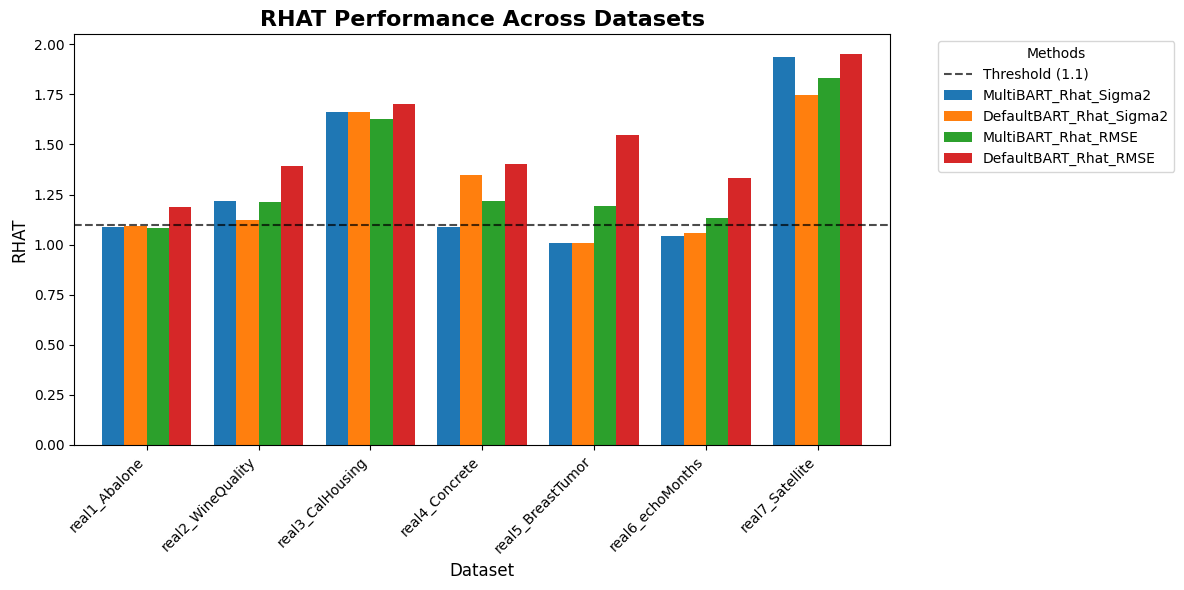


Summary for TEST_MSE
                          bart_mtmh              bart               btz               sto                rf               xgb
Dataset                                                                                                                      
real1_Abalone        4.9894(0.3851)    4.9748(0.3059)    4.9416(0.3074)    4.8934(0.3577)    4.9276(0.2921)    5.5966(0.2619)
real2_WineQuality    0.4604(0.0221)    0.4688(0.0230)    0.4722(0.0169)    0.4753(0.0234)    0.3730(0.0260)    0.4085(0.0229)
real3_CalHousing     0.2141(0.0057)    0.2244(0.0064)    0.2848(0.0060)    0.2716(0.0070)    0.2610(0.0090)    0.2213(0.0054)
real4_Concrete      18.1365(3.9628)   20.2613(1.8537)   20.4191(3.0487)   20.6701(2.7909)   25.4440(2.7678)   21.7897(4.6838)
real5_BreastTumor   87.6655(0.4615)   87.9438(0.4422)   87.8434(0.4569)   88.0357(0.4738)  110.5386(0.6099)   89.2332(0.5569)
real6_echoMonths   129.8159(2.4003)  130.7298(2.2434)  131.1064(2.5459)  132.9266(2.5395)  134.1

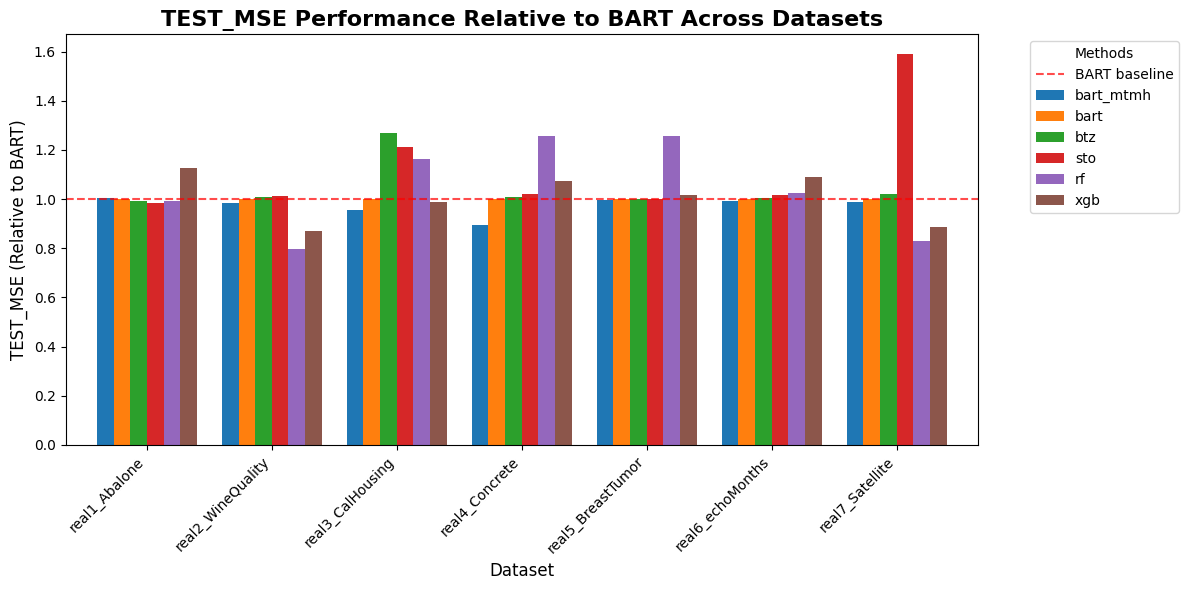


Summary for PI_LENGTH
                         bart_mtmh             bart              btz                                    sto
Dataset                                                                                                    
real1_Abalone       7.9453(0.1332)   8.0678(0.1046)   8.2779(0.0791)                        18.3410(0.5274)
real2_WineQuality   2.4689(0.0288)   2.5725(0.0260)   2.6636(0.0184)                         1.8693(0.0443)
real3_CalHousing    1.5456(0.0143)   1.6880(0.0141)   2.1607(0.0217)                         1.1983(0.0394)
real4_Concrete     13.5017(0.9938)  14.1518(0.3782)  16.5555(0.3295)                        55.4603(5.8984)
real5_BreastTumor  36.5369(0.0327)  36.5929(0.0319)  36.6856(0.0327)                       345.2244(1.3841)
real6_echoMonths   43.7596(0.1633)  44.1282(0.1330)  44.7815(0.1652)                       541.7107(6.1140)
real7_Satellite     1.7662(0.0495)   2.3588(0.0406)   2.8412(0.0541)  438703966743.6303(1387291869917.9512)


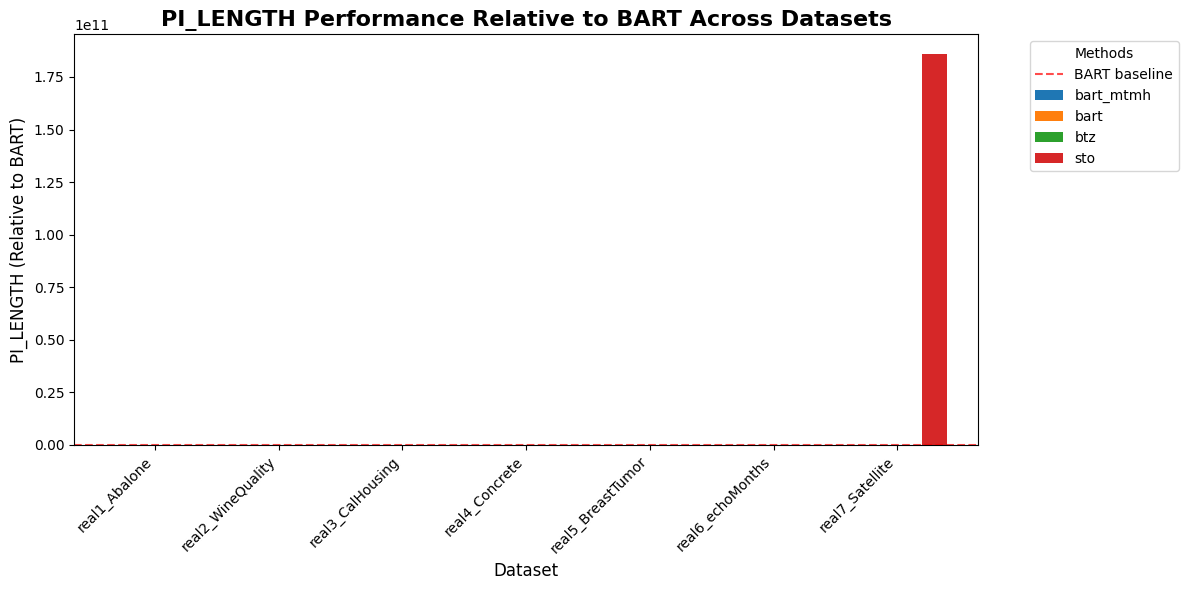


Summary for COVERAGE
                        bart_mtmh            bart             btz             sto
Dataset                                                                          
real1_Abalone      0.9272(0.0112)  0.9286(0.0085)  0.9332(0.0076)  0.9789(0.0048)
real2_WineQuality  0.9332(0.0087)  0.9381(0.0074)  0.9428(0.0061)  0.8110(0.0132)
real3_CalHousing   0.9230(0.0041)  0.9313(0.0043)  0.9476(0.0031)  0.6672(0.0124)
real4_Concrete     0.9267(0.0315)  0.9031(0.0246)  0.9384(0.0148)  0.9884(0.0095)
real5_BreastTumor  0.9366(0.0008)  0.9369(0.0011)  0.9373(0.0010)  0.9999(0.0001)
real6_echoMonths   0.9358(0.0045)  0.9383(0.0029)  0.9426(0.0027)  0.9985(0.0007)
real7_Satellite    0.8486(0.0107)  0.8929(0.0062)  0.9176(0.0068)  0.9131(0.0450)


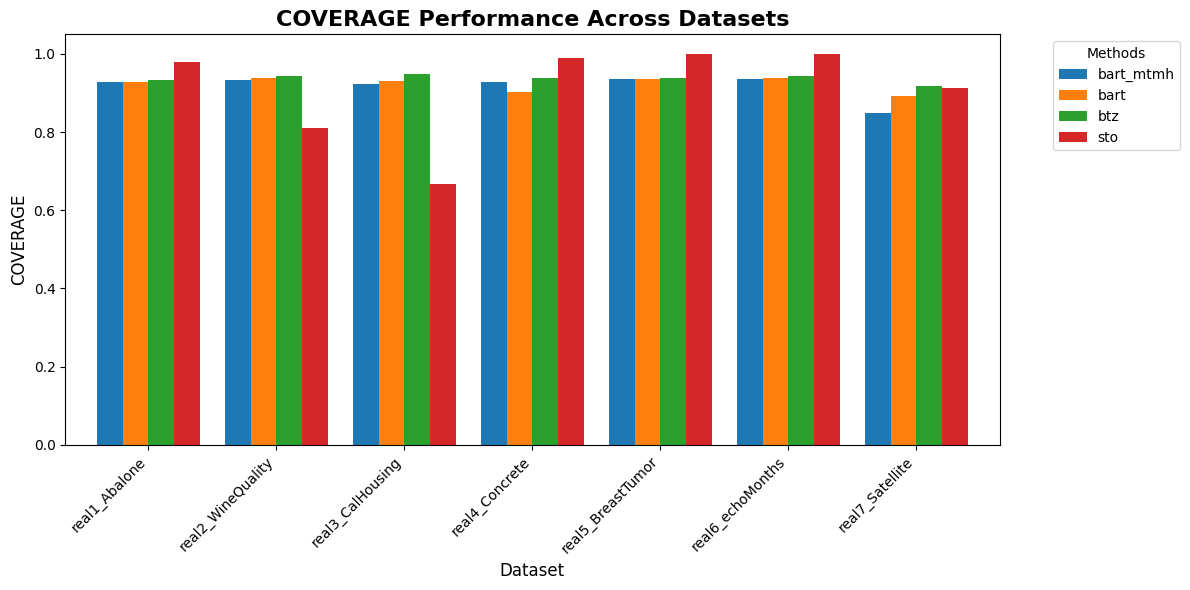


Summary for TRAIN_TIME
                             bart_mtmh               bart                btz                 sto               rf             xgb
Dataset                                                                                                                          
real1_Abalone         175.8506(3.0595)    22.3824(6.5414)    29.3432(5.7249)     36.2029(1.4586)   1.4709(0.0633)  0.0987(0.0492)
real2_WineQuality     200.7707(4.4809)    27.8871(3.8545)    33.2142(4.9673)     55.9654(1.7190)   2.7754(0.0392)  0.1263(0.0571)
real3_CalHousing     524.1136(12.1273)    77.1965(6.2848)    45.4334(4.5746)    169.7417(6.3218)  13.3724(0.1472)  0.2004(0.0930)
real4_Concrete         87.1085(0.7699)    13.8861(6.5115)    26.0857(6.7048)     10.9974(1.8362)   0.4156(0.0822)  0.1128(0.0578)
real5_BreastTumor  3349.5152(160.3896)  398.1239(26.1744)  189.5132(13.1929)  1024.5310(14.0440)  28.2501(0.3023)  0.4983(0.1185)
real6_echoMonths     494.2498(21.5536)   72.0084(12.6969)    38.90

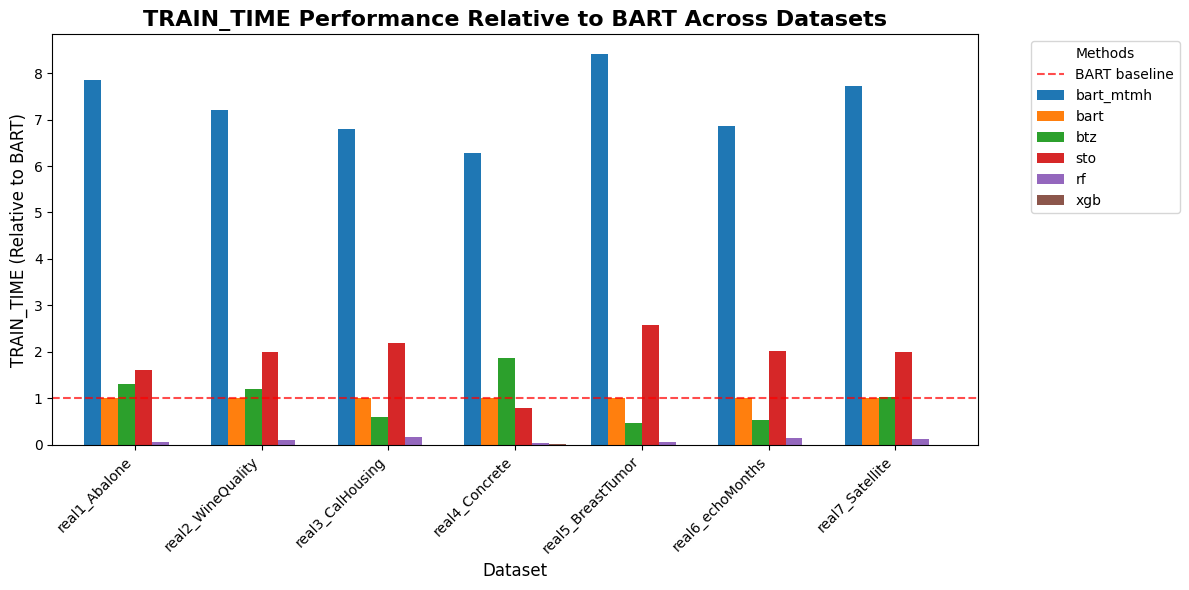

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

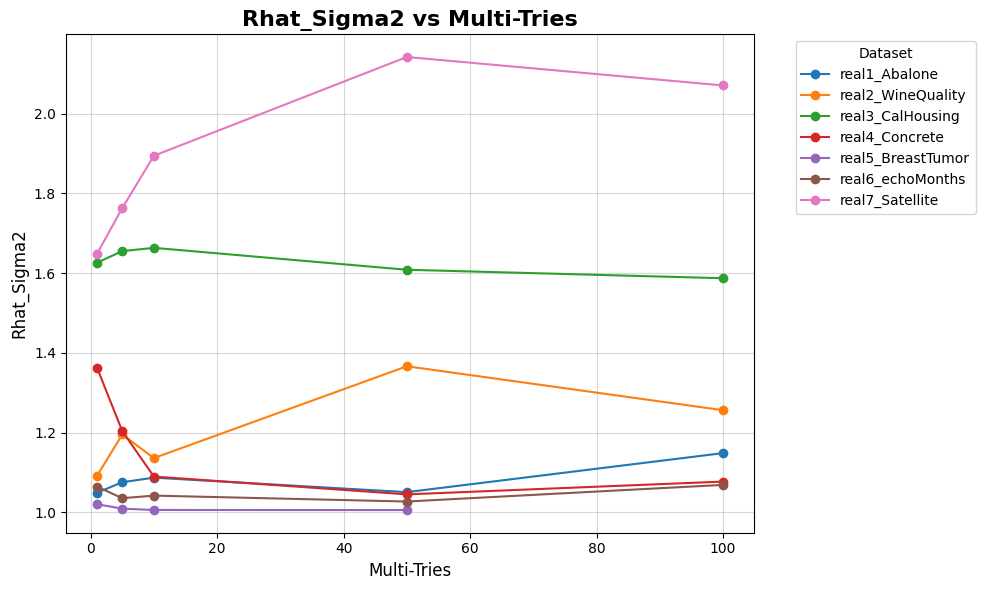

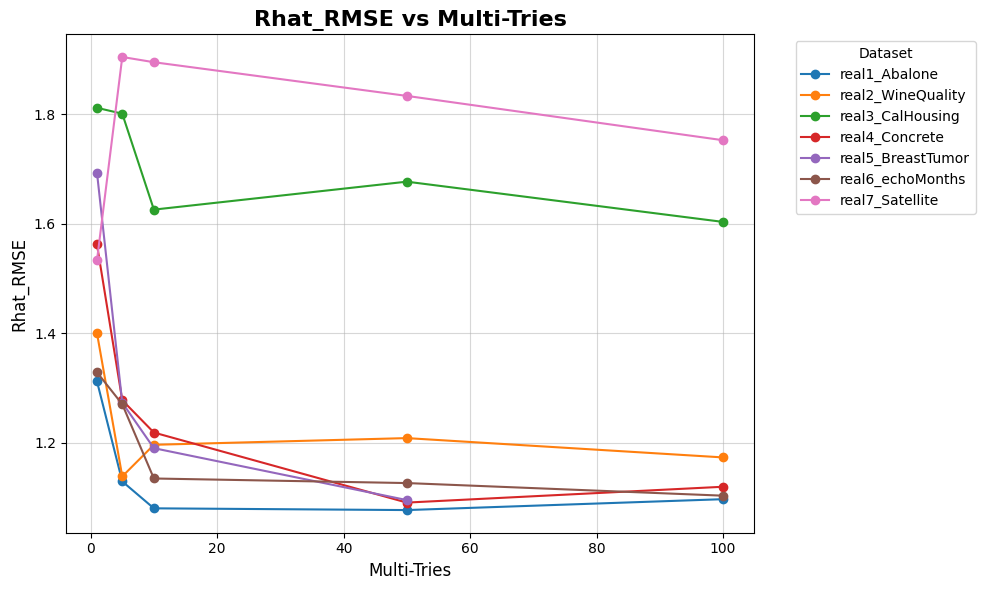

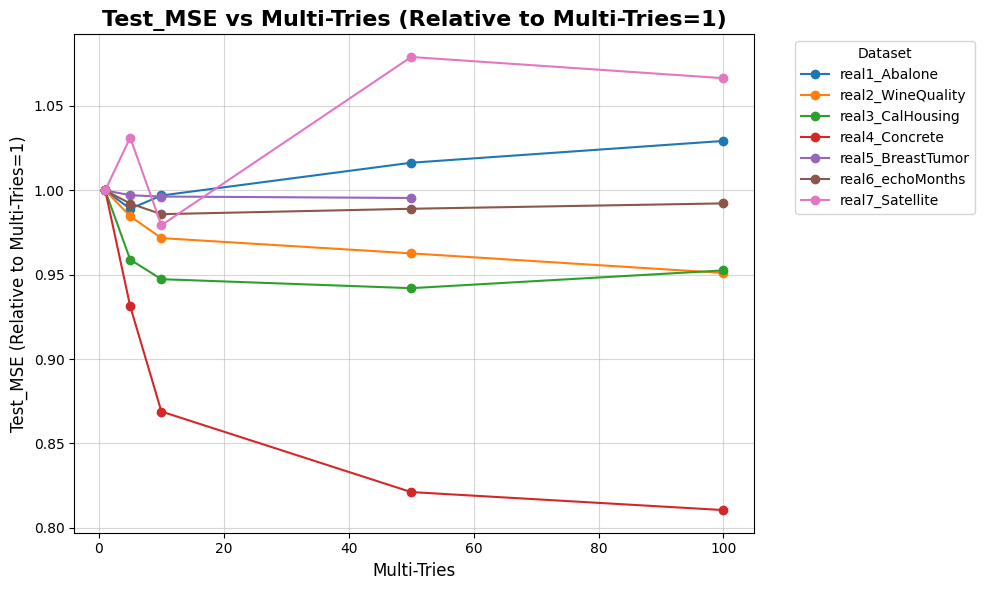

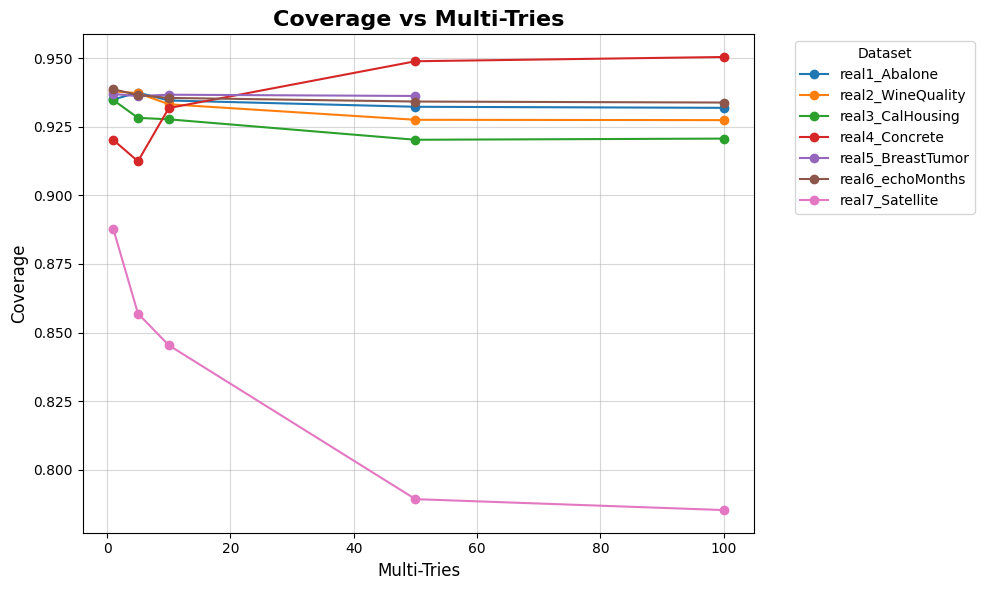

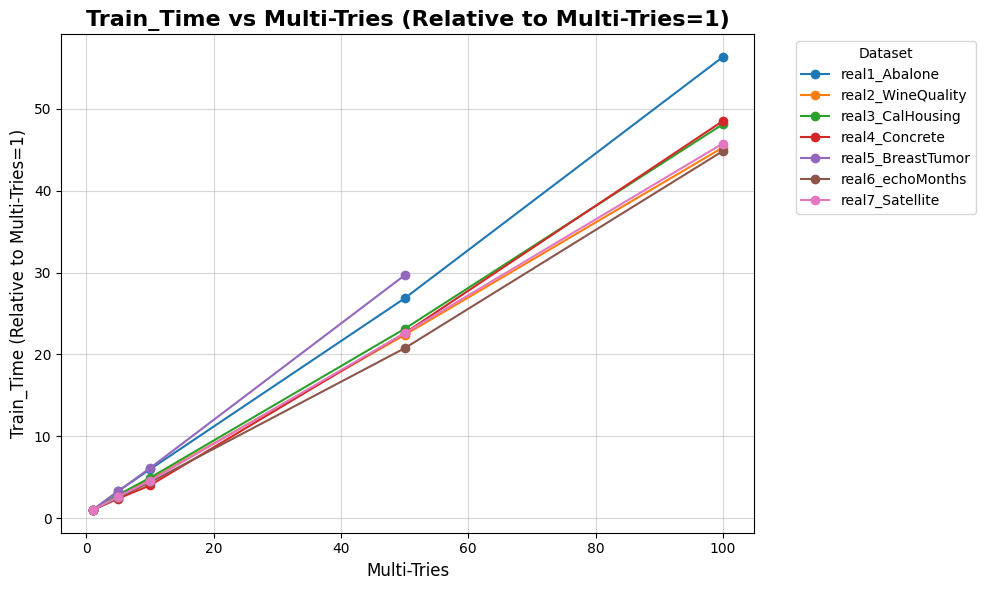

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 'real7_Satellite']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()